In [54]:
import matplotlib.pyplot as plt
import nibabel as nib
import pandas as pd
import numpy as np
import time
import cv2
import os

from PIL import Image

In [4]:
home = os.path.expanduser('~')
directory = os.path.join('Datasets', 'ImageCLEF')
filename = '4231cdb3-af46-4674-be08-95b904a62093_TrainSet_metaData.csv'
path = os.path.join(home, directory, filename)

# df = pd.read_csv(path)
# df.head(10)

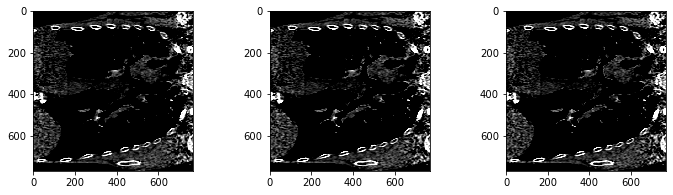

In [52]:
%matplotlib inline

img_path = os.path.join(directory, 'Dataset', 'TRN_0066.nii.gz')
slice = 253

image_vol = nib.load(img_path)
vol_arr = image_vol.get_fdata()

dims = (768, 768)

image_slice = vol_arr[:, slice, :]    
slice_resized = cv2.resize(image_slice, 
                           dims, 
                           interpolation=cv2.INTER_AREA)

slice_resized2 = cv2.resize(image_slice, 
                           dims, 
                           interpolation=cv2.INTER_CUBIC)
# cv2.imshow(slice_resized)

slice_resized3 = cv2.resize(image_slice, 
                           dims, 
                           interpolation=cv2.INTER_LANCZOS4)


figure = plt.figure(figsize=(12, 10))
ax1 = figure.add_subplot(3, 3, 1)
ax2 = figure.add_subplot(3, 3, 2)
ax3 = figure.add_subplot(3, 3, 3)

ax1.imshow(slice_resized, cmap='gray', vmin=0, vmax=255)
ax2.imshow(slice_resized2, cmap='gray', vmin=0, vmax=255)
ax3.imshow(slice_resized3, cmap='gray', vmin=0, vmax=255)

(512, 512, 117)


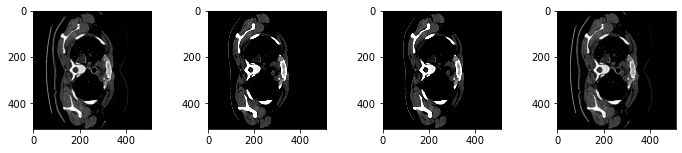

In [68]:
%matplotlib inline

img_path = os.path.join(directory, 'Dataset', 'TRN_0700.nii.gz')



slice = 100

image_vol = nib.load(img_path)
vol_arr = image_vol.get_fdata()

print(vol_arr.shape)

dims = (512, 512)

image_slice = vol_arr[:, :, slice] 

img1 = Image.fromarray(image_slice)
slice_resized1 = img1.resize(dims,
                            Image.BICUBIC
                            )

slice_resized2 = cv2.resize(image_slice, 
                           dims, 
                           interpolation=cv2.INTER_CUBIC)
# cv2.imshow(slice_resized)

slice_resized3 = cv2.resize(image_slice, 
                           dims, 
                           interpolation=cv2.INTER_LANCZOS4)

img2 = Image.fromarray(image_slice)
slice_resized4 = img1.resize(dims,
                            Image.LANCZOS)

figure = plt.figure(figsize=(12, 10))
ax1 = figure.add_subplot(4, 4, 1)
ax2 = figure.add_subplot(4, 4, 2)
ax3 = figure.add_subplot(4, 4, 3)
ax4 = figure.add_subplot(4, 4, 4)

ax1.imshow(slice_resized1, cmap='gray', vmin=0, vmax=255)
ax2.imshow(slice_resized2, cmap='gray', vmin=0, vmax=255)
ax3.imshow(slice_resized3, cmap='gray', vmin=0, vmax=255)
ax4.imshow(slice_resized4, cmap='gray', vmin=0, vmax=255)

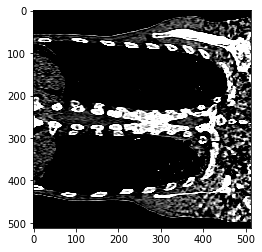

In [37]:
plt.imshow(slice_resized2, cmap='gray', vmin=0, vmax=255)
plt.show()

In [8]:
h = os.listdir(os.path.join(home, directory, 'Images'))

In [9]:
len(h)

184116

In [3]:
# df.count()

In [4]:
# df.TypeOfTB.value_counts()

In [7]:
base_path = os.path.join(home, directory)
base_dataset = os.path.join(base_path, 'Dataset')
base_processed = os.path.join(base_path, 'Images')

image_vol_list = os.listdir(base_dataset)
total_time = 0

for i, image in enumerate(image_vol_list):
    image_path = os.path.join(base_dataset, image)
    base_name = image.split('.')[0]
    
    image_vol = nib.load(image_path)
    vol_arr = image_vol.get_fdata()
    
    t0 = time.clock()
    for slice in range(150, 350+1):
        image_slice = vol_arr[slice, :, :]
        slice_resized = cv2.resize(image_slice, 
                                   (512, 512), 
                                   interpolation=cv2.INTER_NEAREST_EXACT)
        
        new_name = f'{base_name}_{slice}.png'
        save_path = os.path.join(base_processed, new_name)
        
        cv2.imwrite(save_path, slice_resized)
        
    total_time += time.clock() - t0
    print(f"""
    Processed: {base_name}
    Total Time Elapsed: {total_time}\n""")


/home/ayushman.singh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app



    Processed: TRN_0001
    Total Time Elapsed: 20.43



/home/ayushman.singh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
